In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight') 

In [10]:
df = pd.read_csv('archive (4)/PJME_hourly.csv')
print(df.head())
df= df.set_index('Datetime')

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


In [12]:
df.index = pd.to_datetime(df.index)

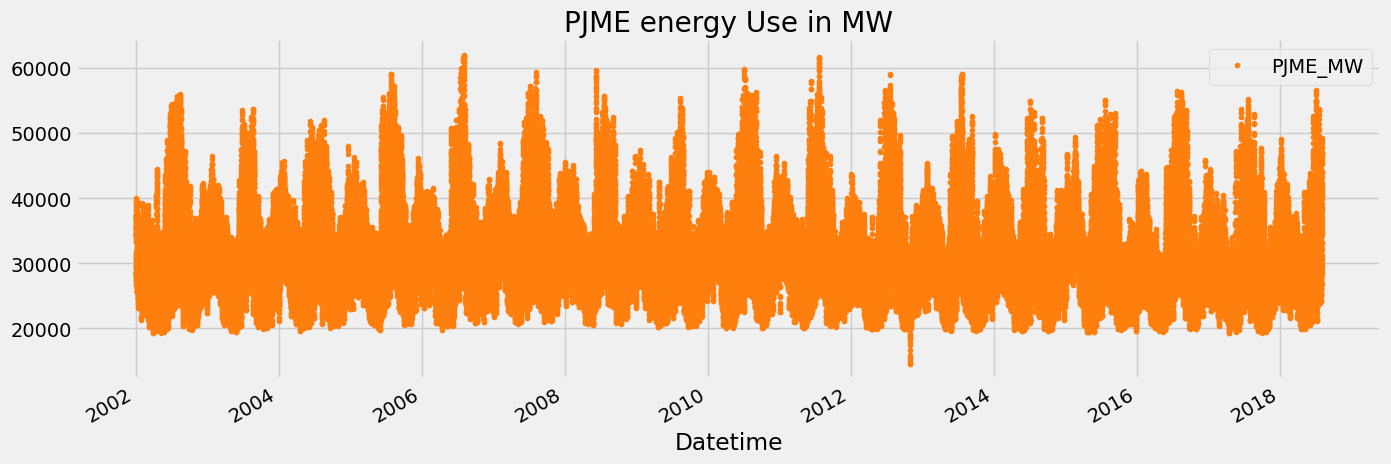

In [23]:
df.plot(
    style='.',
    figsize=(15,5),
    color =color_pal[1],
    title='PJME energy Use in MW'
)
plt.show()

In [19]:
train = df.loc[df.index < '01-01-2015']
train

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0


In [21]:
test = df.loc[df.index > '01-01-2015']
test

,PJME_MW
Datetime,
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
2015-12-31 05:00:00,22773.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


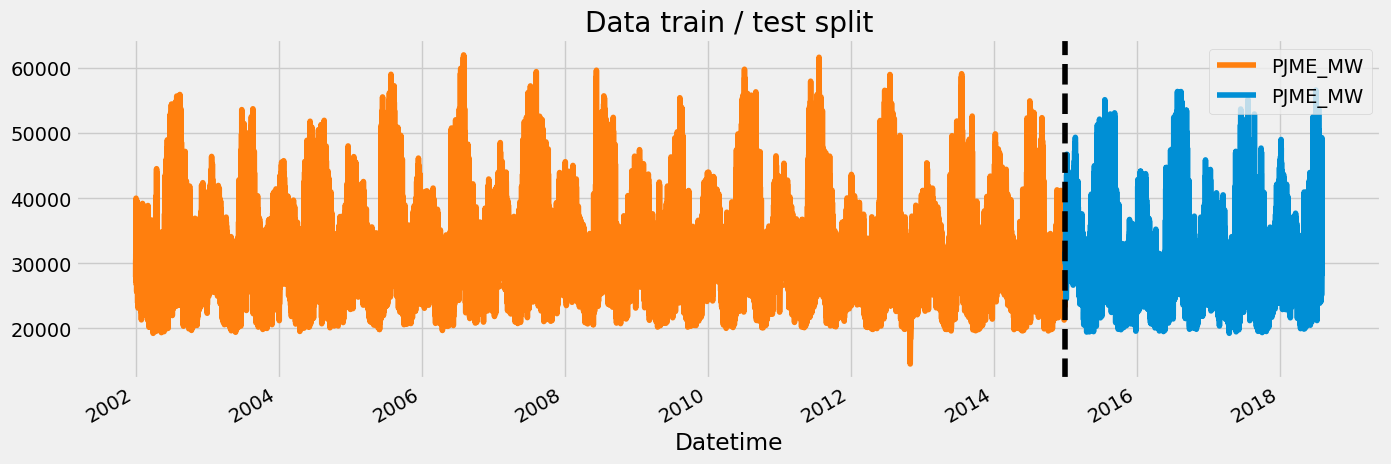

In [29]:
fig , ax = plt.subplots(figsize = (15,5))

train.plot(ax = ax , label = 'Traing set' , title='Data train / test split' ,color = color_pal[1])
test.plot(ax = ax , label = 'Test set')
ax.axvline('01-01-2015', color = 'black', ls = '--')
